# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Adri Sopiana
- **Email:** adrisopiana@apps.ipb.ac.id
- **ID Dicoding:** adrisopiana

## Menentukan Pertanyaan Bisnis

- Berasal dari kota mnanakah pelanggan e-commerce terbanyak?
- Produk mana dengan dimensi dan bobot/berat yang paling besar?

## Import Semua Packages/Library yang Digunakan

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [38]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [39]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [40]:
product_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [41]:
product_categories_name_translation_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/product_category_name_translation.csv")
product_categories_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dari data customer saya mendapatkan informasi tentang kota asal pelanggan dan lain-lain
- Dari data order saya mendapatkan informasi order delivered customer dan estimated delivery
- Dari data product saya mendapatkan informasi category product, weight, length, width dan lainnya.

### Assessing Data

In [42]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [43]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [44]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [45]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [46]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [47]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


### Cleaning Data

In [48]:
orders_df.fillna(value="order_delivered_customer_date", inplace=True)

In [49]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [50]:
product_df.fillna(value="product_category_name", inplace=True)

<ipython-input-50-500a57b1c1ad>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'product_category_name' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  product_df.fillna(value="product_category_name", inplace=True)


In [51]:
product_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [52]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- memperbaiki data orders dan product karena ada missing value

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [55]:
# menggabungkan data 1 dan 2 dengan menyesuaikan nilai pada kolom customer_id yang berperan sebagai primary key dari customer_df dan foreign key dari orders_df.
customers_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/customers_dataset.csv")
orders_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/orders_dataset.csv")

new_order_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)
new_order_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [56]:
new_order_df['customer_city'].value_counts()

,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
bequimao,1
andarai,1
vargem grande,1


In [57]:
new_order_df.groupby(by="customer_city").agg({
    "customer_city": "count",
})

,customer_city
customer_city,
abadia dos dourados,3
abadiania,1
abaete,12
abaetetuba,11
abaiara,2
...,...
xinguara,9
xique-xique,3
zacarias,2


In [58]:
# Konversi ke datetime jika masih berupa string
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# Menghitung selisih waktu
selisih_waktu = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']

print(selisih_waktu)


0        8 days 10:28:40
1       13 days 18:46:08
2        9 days 09:27:40
3       13 days 05:00:36
4        2 days 20:58:23
              ...       
99436    8 days 05:13:56
99437   22 days 04:38:58
99438   24 days 20:37:34
99439   17 days 02:04:27
99440    7 days 16:11:00
Length: 99441, dtype: timedelta64[ns]


In [59]:
# Menggabungkan data 3 dan 4 dengan menyesuaikan nilai pada kolom product_category_name yang berperan sebagai primary key dari product_df dan foreign key dari product_categories_name_translation_df.
product_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/products_dataset.csv")
product_categories_name_translation_df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/Proyek-Analisis-Data/refs/heads/main/product_category_name_translation.csv")

new_product_df = pd.merge(
    left=product_df,
    right=product_categories_name_translation_df,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)
new_product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [60]:
# Pilih kolom yang ingin ditampilkan
df_dipilih = new_product_df[['product_category_name_english', 'product_weight_g']]

# Menampilkan hasilnya
print(df_dipilih)


      product_category_name_english  product_weight_g
0                         perfumery             225.0
1                               art            1000.0
2                    sports_leisure             154.0
3                              baby             371.0
4                        housewares             625.0
...                             ...               ...
32323               furniture_decor           12300.0
32324     construction_tools_lights            1700.0
32325                bed_bath_table            1400.0
32326         computers_accessories             700.0
32327                bed_bath_table            2083.0

[32328 rows x 2 columns]


**Insight:**
- Mengetahui jumlah pelanggan dari setiap kota. Diurutkan dari jumlah pelanggan yang terbanyak dan diurutkan dari alfabet nama kota A-Z.
- Mengetahui berapa lama waktu pemesanan. Dari kita memesan sampai barangnya datang. Bisa dicari rata-rata, modus, dll.
- Mengetahui berat dari setiap kategori produk.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berasal dari kota mnanakah pelanggan e-commerce terbanyak?


In [61]:
new_order_df['customer_city'].value_counts()

,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
bequimao,1
andarai,1
vargem grande,1


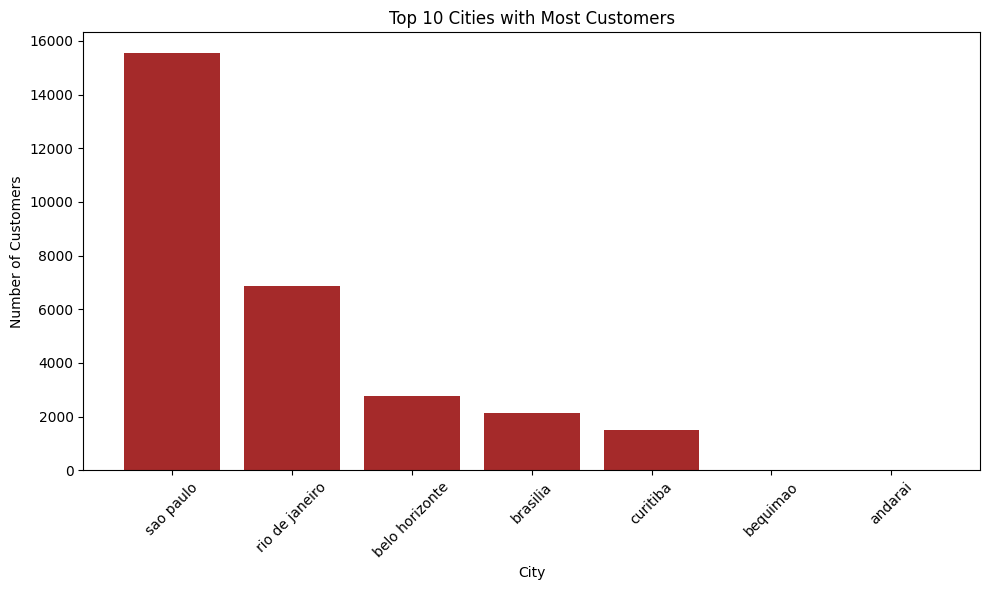

In [62]:
data = {'customer_city': ['sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia', 'curitiba', 'bequimao', 'andarai'],
        'count': [15540, 6882, 2773, 2131, 1521, 1, 1]}

df = pd.DataFrame(data)

# Menampilkan hanya kota dengan jumlah tertinggi
top_cities = df.sort_values('count', ascending=False).head(10)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_cities['customer_city'], top_cities['count'], color='brown')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Top 10 Cities with Most Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Produk kategori apa yang memiliki berat rata-rata yang besar?

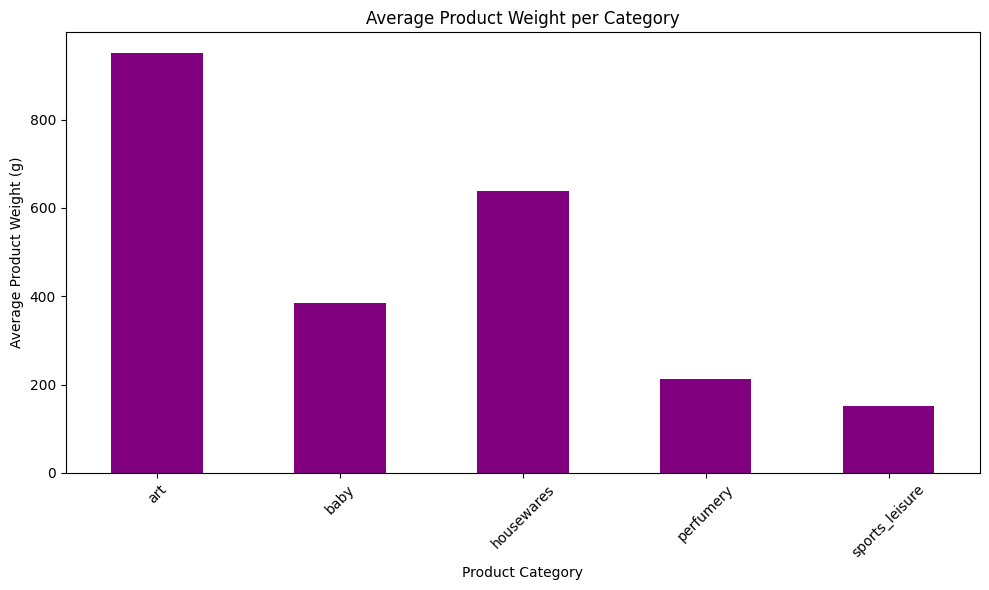

In [63]:
data = {
    'product_category_name_english': ['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
                                      'perfumery', 'art', 'sports_leisure', 'baby', 'housewares'],
    'product_weight_g': [225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 900.0, 150.0, 400.0, 650.0]
}

df = pd.DataFrame(data)

# Menghitung rata-rata berat per kategori
mean_weight_per_category = df.groupby('product_category_name_english')['product_weight_g'].mean()

# Membuat bar chart
plt.figure(figsize=(10, 6))
mean_weight_per_category.plot(kind='bar', color='purple')
plt.xlabel('Product Category')
plt.ylabel('Average Product Weight (g)')
plt.title('Average Product Weight per Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1: Pelanggan e-commerce terbanyak berasal dari kota Sau Paulo
- Conclution pertanyaan 2 : Kategori produk dengan rata-rata berat yang besar yaitu kategori seni(art)

In [68]:
new_order_df.to_csv("all_data1.csv", index=False)

In [69]:
new_product_df.to_csv("all_data2.csv", index=False)